<h1 align="center">Linear Regression with TensorFlow</h1>

    Nathaniel Neubert
    2/4/2021

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import matplotlib.patches as mpatches

First, we will import our data into a pandas dataframe

In [10]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

Now we are going to look for correlations in the data.
Here we examine the correlation between engine size and CO2 emissions.

In [15]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

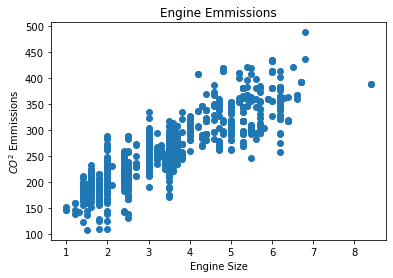

In [23]:
plt.scatter(train_x,train_y)
plt.xlabel('Engine Size')
plt.ylabel(r'$CO^2$ Emmissions')
plt.title("Engine Emmissions")
plt.show()

As we can see, there appears to be a correlation between Engine Size and CO2 emmissions. Therefore, we will attempt to model this with linear regression

In [26]:
# Initialize Guesses for our variables
a = tf.Variable(30.0)
b = tf.Variable(70.0)

# Define a function we wil fit to our model
def h(x):
    y = a*x+b
    return y

#In order to train our function, we need another
#function to tell it if it is doing well or poorly.
#This is called a loss function. 
#For linear regression, we wish to minimize the
#R-squared difference between the data and the model
def loss_object(y, train_y):
    '''
    Takes in a vector from the current model and
    the actual data, determines how well it fits
    by finding their difference, squaring them
    and averaging this.
    '''
    return tf.reduce_mean(tf.square(y - train_y))

With preparations complete, we will prepare a trainer for our model

In [27]:
learning_rate = 0.01
train_data = []
loss_values = []
# Steps of looping through data to update the parameters
training_epochs = 150

#train model
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(train_x)
        loss_value = loss_object(train_y,y_predicted)
        loss_values.append(loss_value)
        
        # create gradients
        gradients = tape.gradient(loss_value,[b,a])
        
        # compute and adjust weights
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

Now we will see how well our model was able to learn

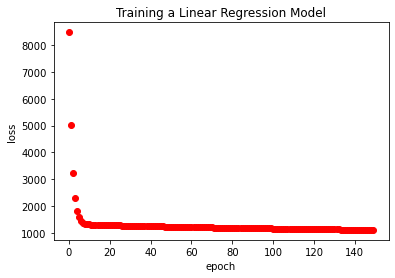

In [31]:
plt.plot(loss_values,'ro')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training a Linear Regression Model')
plt.show()

We see that the model quickly approached a good point and then tappered off learning much more slowly

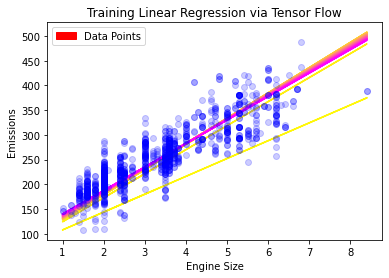

In [48]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'bo', label='Data Points', alpha=.2)

plt.legend(handles=[green_line])
plt.title("Training Linear Regression via Tensor Flow")
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

In [54]:
xspace = np.linspace(0,9,100)
a,b = train_data[-1]
f_y = h(xspace)
plt.plot(xspace,f_y, label="Line of Best Fit: "+ str(a)+'x+'+str(b))
plt.scatter(train_x,train_y,alpha=.2,c='r',label="Data Point")
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.title('Engine Size vs Emissions')
plt.legend()
plt.show()

Thus we see that we have been successful in creating a linear regression model based on the data of Engine Size and Emissions using Tensor flow. This model was very basic and could easily be expanded. By altering the h function, we could add additional variables such as the year the vehicle was made or group together the different vehicle types by make. 